# 8.1 multi-variable regression
* Linear regression is good model for predicting input data's feature
  1. well presented current data
  2. good for future prediction

* If ther is more than one variable, it is called multivariable regression analysis.

In [ ]:
!gdown https://github.com/dongupak/DataML/raw/main/csv/life_expectancy.csv

Downloading...
From: https://github.com/dongupak/DataML/raw/main/csv/life_expectancy.csv
To: /content/life_expectancy.csv
333kB [00:00, 16.2MB/s]       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('life_expectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


* From this dataset, we are going to expect life expectancy. And which variables should we choose to make better prediction model?


1. Global Search Method: explore the entire solution space for optimal feature selection or model parameter settings.
2. Forward Selection: stepwise feature method that starts with an empty model and progressively adds features one at a time. At each step, the feature that improves the model the most is added
3. Backward Elimination: another stepwise feature selection method, but unlike forward selection, it starts with all available features and eliminates the least significant features one by one

* We will use Forward selection method in this chapter

In [ ]:
print('Life expectancy outline:')
print(df.describe())

Life expectancy outline:
              Year  Life expectancy  ...  Income composition of resources    Schooling
count  2938.000000      2928.000000  ...                      2771.000000  2775.000000
mean   2007.518720        69.224932  ...                         0.627551    11.992793
std       4.613841         9.523867  ...                         0.210904     3.358920
min    2000.000000        36.300000  ...                         0.000000     0.000000
25%    2004.000000        63.100000  ...                         0.493000    10.100000
50%    2008.000000        72.100000  ...                         0.677000    12.300000
75%    2012.000000        75.700000  ...                         0.779000    14.300000
max    2015.000000        89.000000  ...                         0.948000    20.700000

[8 rows x 20 columns]


* From code above, we can check 'Year' column has no missing value.
* But 'schooling' columns only has 2775 counts which mean number of missing value is 163.

In [ ]:
print('Data\'s columns')
print(df.columns)

Data's columns
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<Axes: >

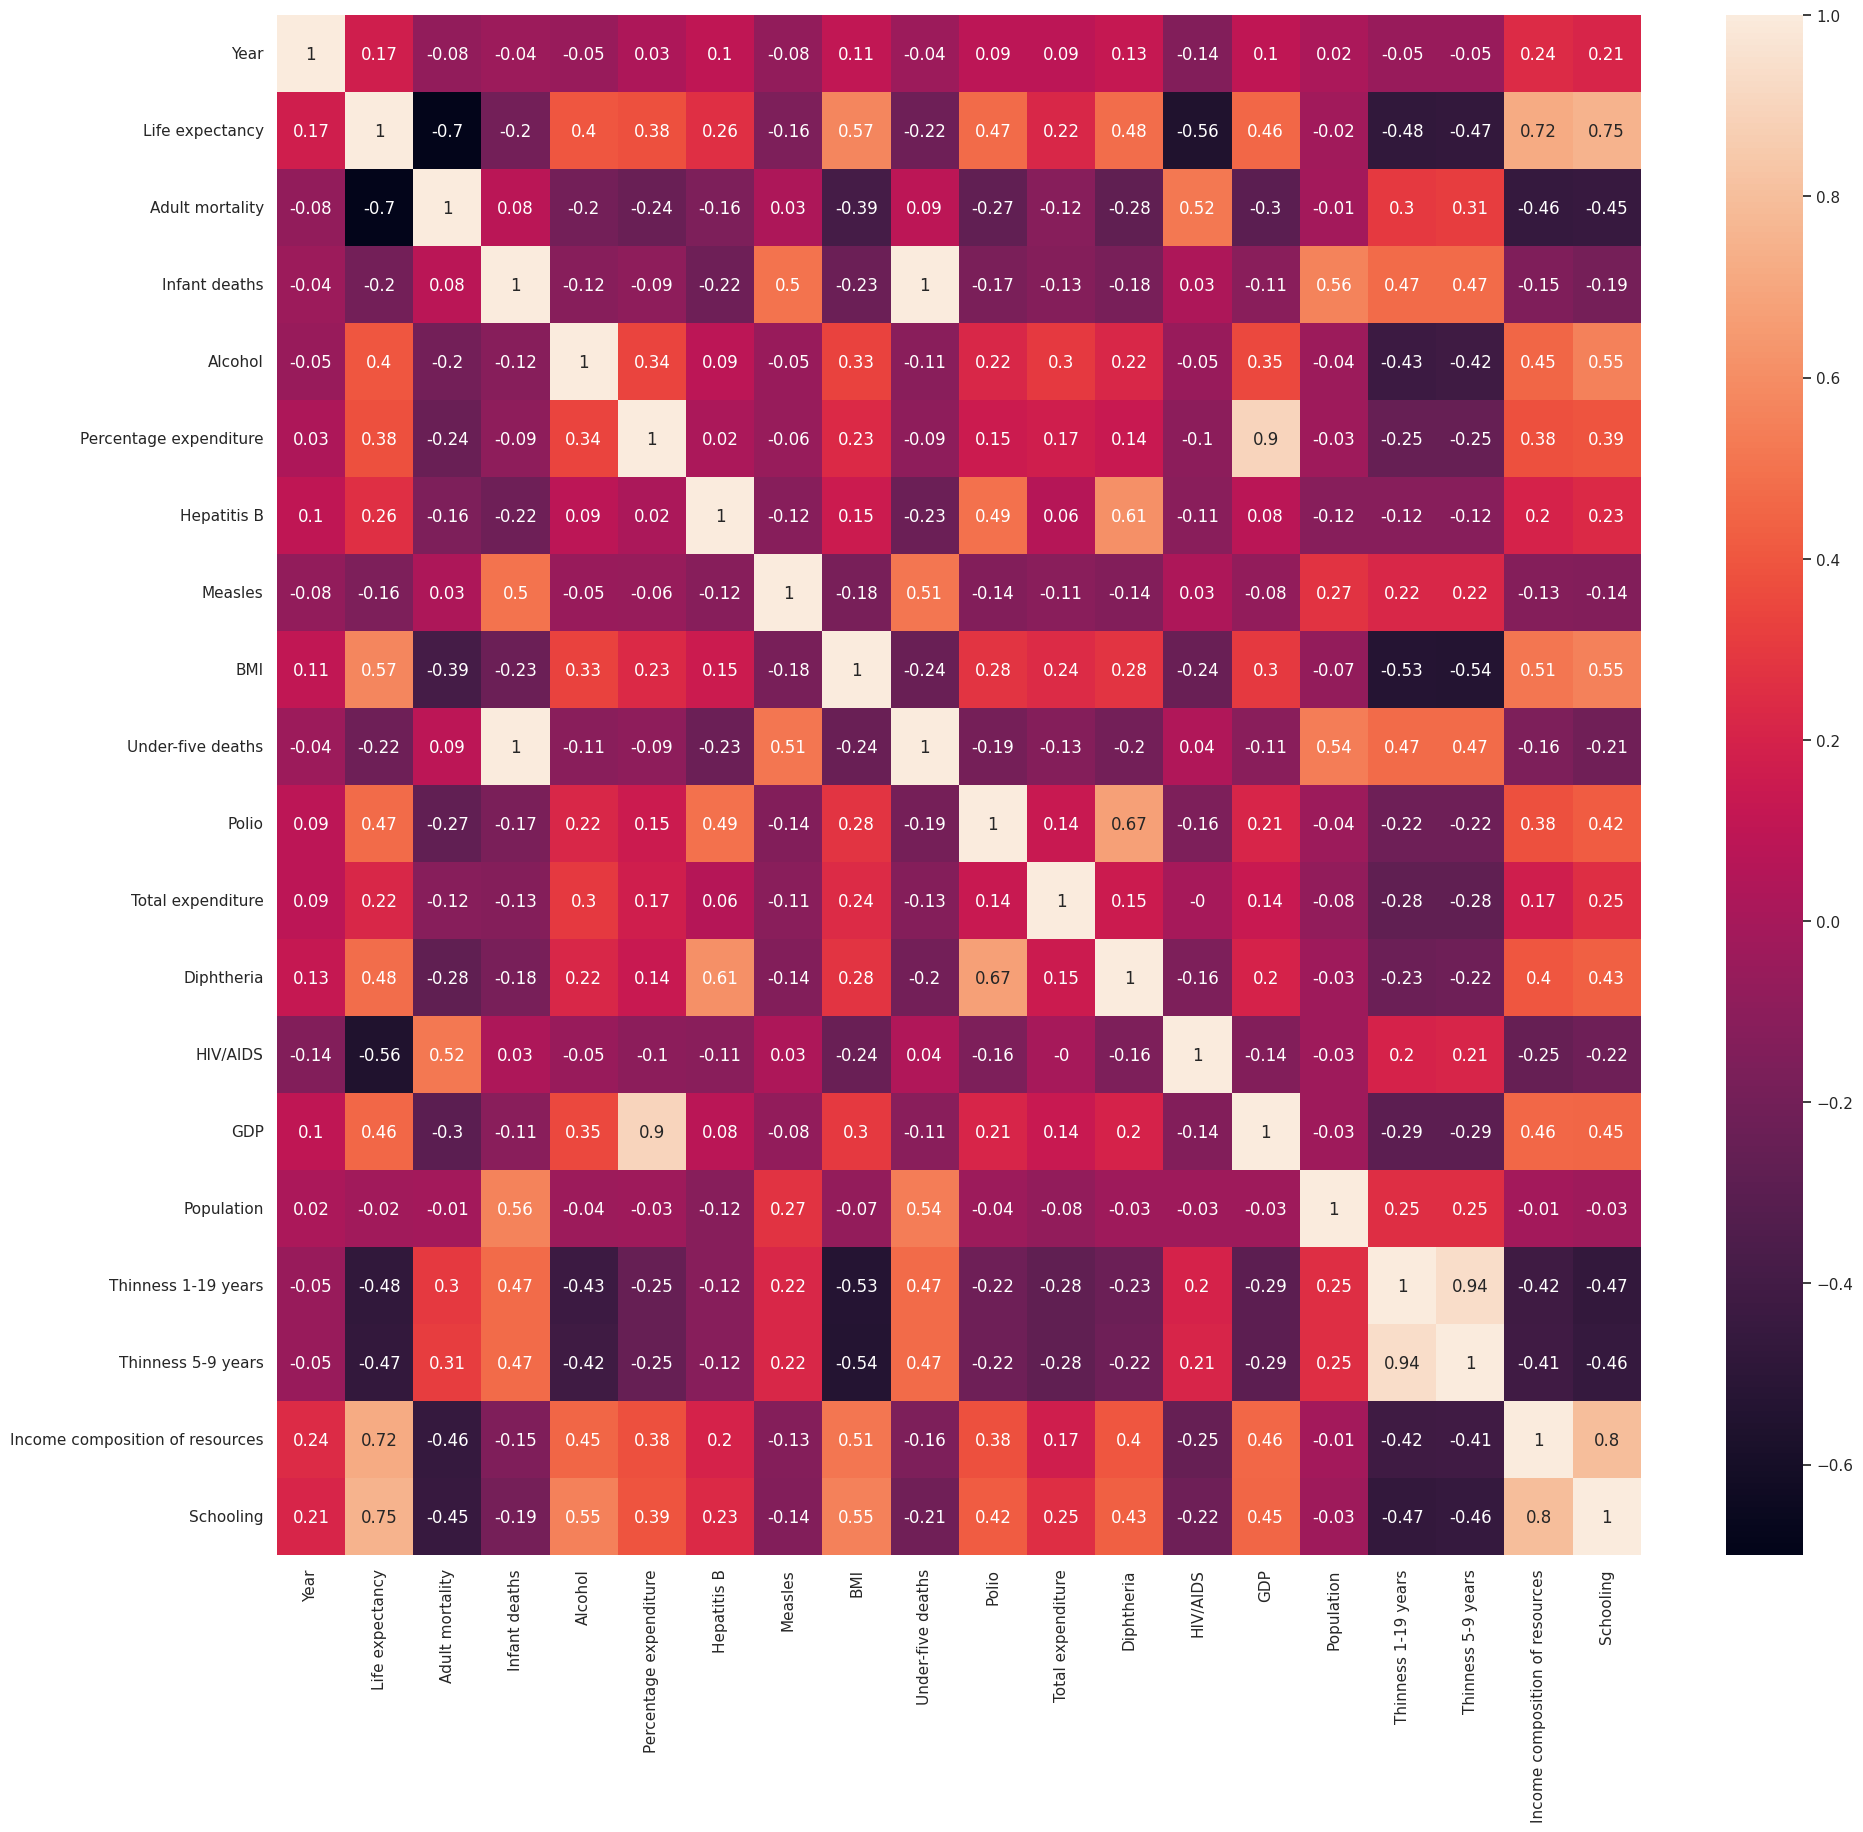

In [ ]:
# set seaborn library's size
sns.set(rc={'figure.figsize':(22,20)})
correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# 8.4 which data is correlated to life_expectancy?
* Let's print correlation coefficient of life expectancy and other features


In [ ]:
print('Life expectancy correlation coefficient')
print(df.corr(numeric_only=True).round(3)['Life expectancy'])

Life expectancy correlation coefficient
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [ ]:
# 'Life expectancy' and other feature's correlation
c = df.corr(numeric_only=True).round(2)['Life expectancy']
c = np.abs(c)
print(c.sort_values(ascending=False)[1:8]) # print 7 highest values

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


* We sliced from 1, beacause 0 is 'Life expectancy' itself!


In [ ]:
print('Bottom 5 Life expectancy correlated features')
print(c.sort_values(ascending=False)[-6:-1])

Bottom 5 Life expectancy correlated features
Under-five deaths    0.22
Total expenditure    0.22
Infant deaths        0.20
Year                 0.17
Measles              0.16
Name: Life expectancy, dtype: float64


* Inductive Inquiry(based on result) vs Deductive Inquiry (based on hypothesis)

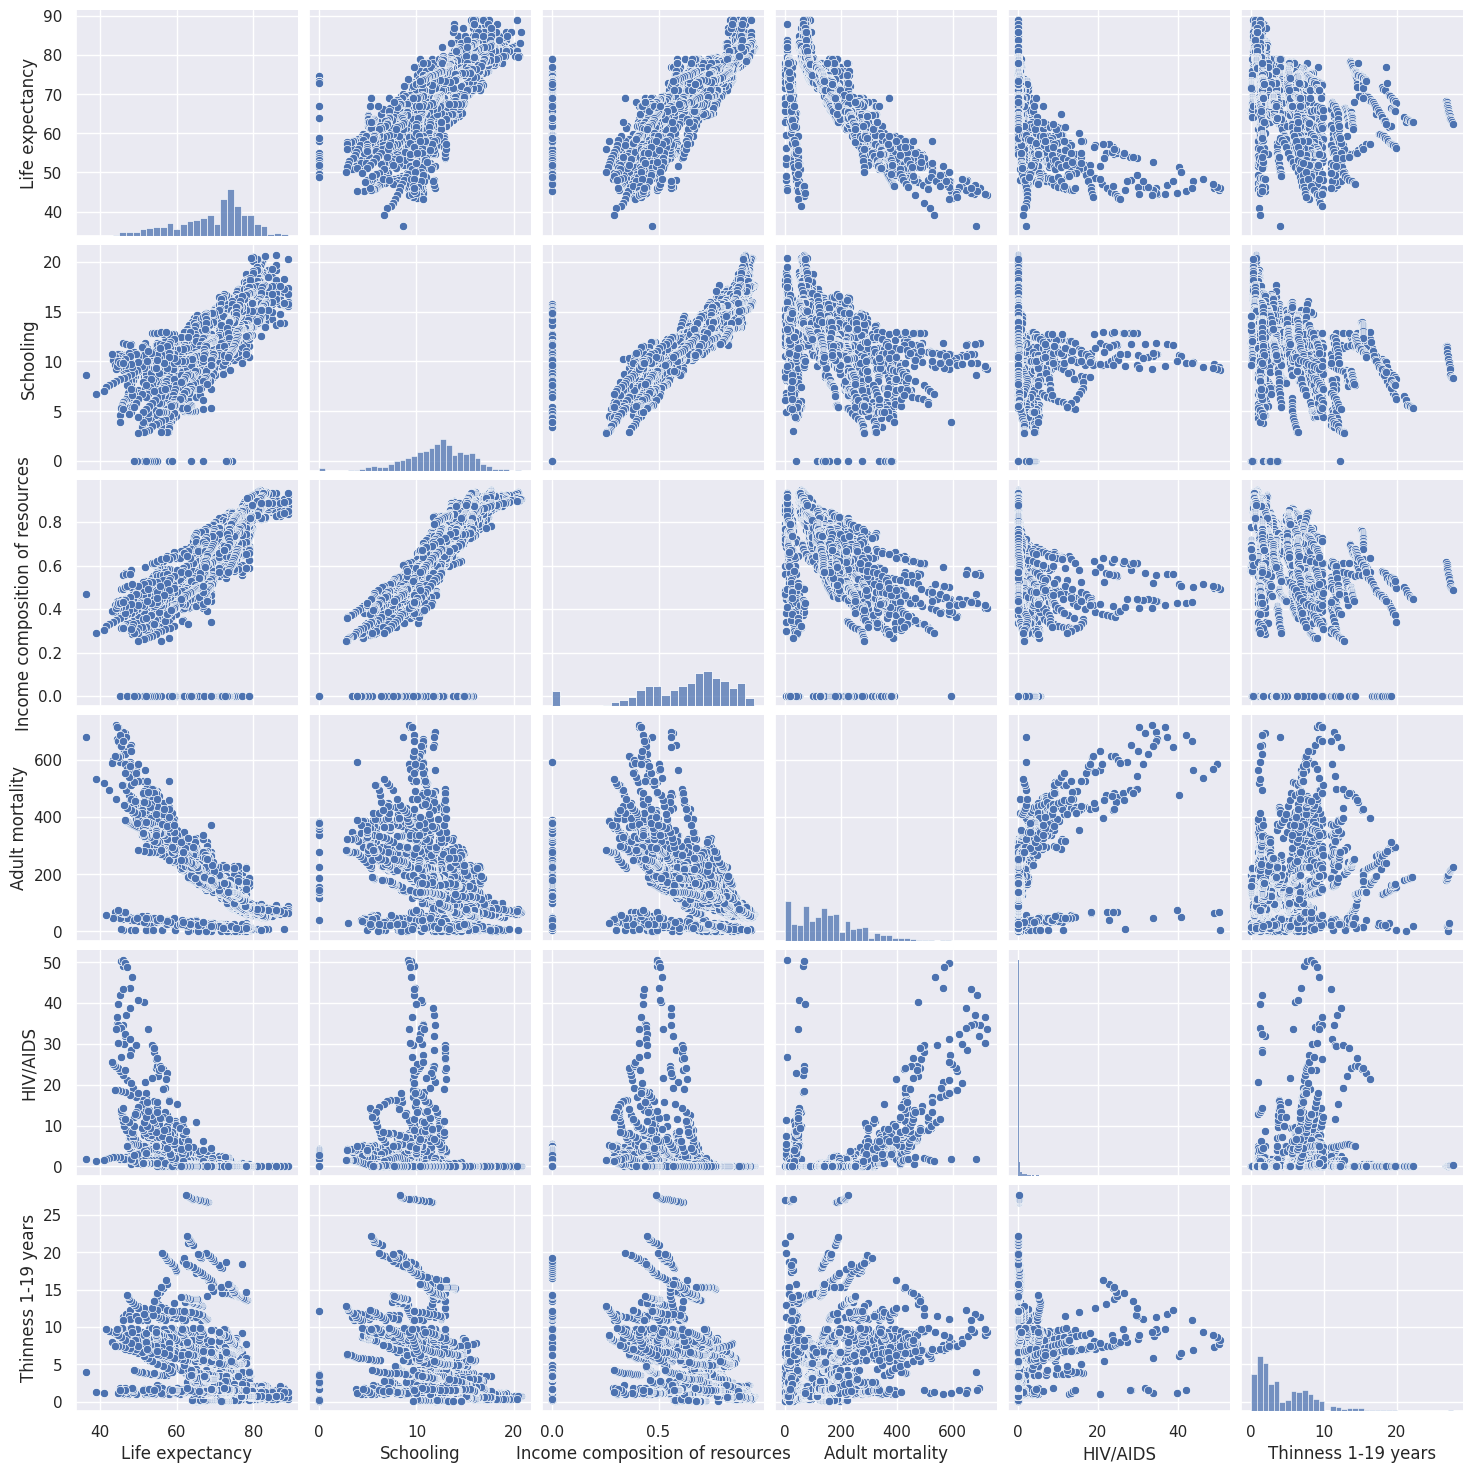

In [ ]:
sns.pairplot(df[['Life expectancy', 'Schooling','Income composition of resources',\
                 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']])
plt.show()

* Based on pairplot, Life expectancy and Schooling and Income composition of resources have diagonal shape which indicates high correlation rate.
* So we will make linear regression model using this highly correlated features.
* Before do that, we need to check missing values from features by using isna().sum() method.

In [ ]:
df[['Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']].isna().sum()

,0
Schooling,163
Income composition of resources,167
Adult mortality,10
HIV/AIDS,0
Thinness 1-19 years,34


In [ ]:
from sklearn.model_selection import train_test_split

df.dropna(inplace=True) # remove missing values
X = df[['Schooling','Income composition of resources',\
                 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Score of linear regression model:', round(model.score(X_test, y_test),3))

Score of linear regression model: 0.833


# 8.6 Train & Test data & Features
* train_test_split(): Good model can handle unhandled data. When a model can only handle optimized data and can't for newly added data, it is overlifting
* default is 0.2 for test_size which means we only take 20% as test data
* Let's take a look at this data's feature. This time we will use most features of input data except 'Country' and 'Status' which are form of String.
* Use 'Life expectancy' as answer label

In [4]:
import pandas as pd
!gdown https://github.com/dongupak/DataML/raw/main/csv/life_expectancy.csv
life = pd.read_csv('life_expectancy.csv')

life.dropna(inplace=True) # remove missing value
# 'Country', 'Year', 'Status', 'Life expectancy' excepted features
X = life[['Year', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = life['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,\
                                                    test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Score of linear regression:', round(model.score(X_test,y_test), 3))

Downloading...
From: https://github.com/dongupak/DataML/raw/main/csv/life_expectancy.csv
To: /content/life_expectancy.csv
333kB [00:00, 29.0MB/s]       
Score of linear regression: 0.847


* Even though increment of features from 5 to 19, model efficiency hasn't improved.
* We call it 'Garbage-in Garbage-out'

# LAB 8-1
* It is crucial to know features of data.
* Draw a bar graph that shows 'Life expectancy' and other features correlation.
* This is called feature engineering
* It is much easier to find 'Schooling', 'Income composition of resource' and 'Adult mortality' are more correlated compared to other features.

Text(0, 0.5, 'Correlation coef')

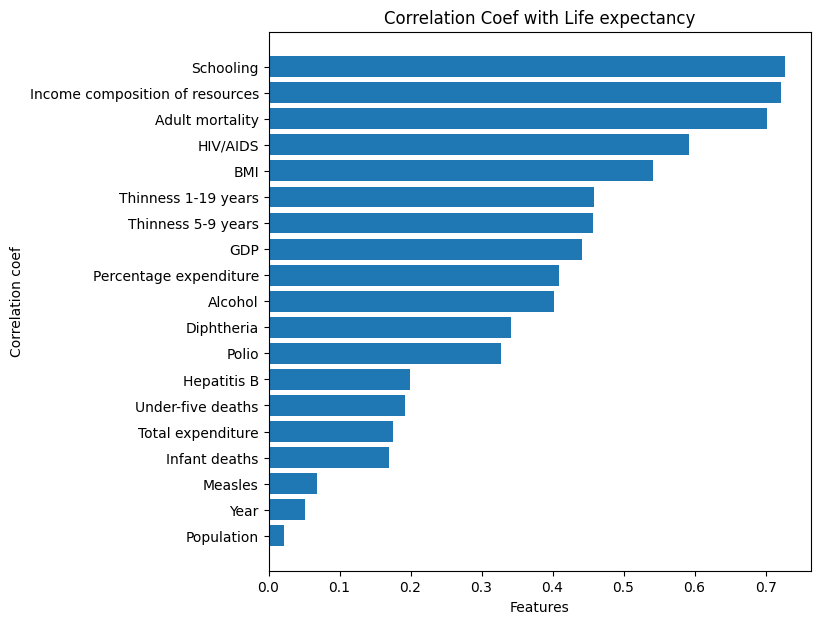

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

life.dropna(inplace=True) # remove missing value

X = life[['Year', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# Correlation coefficient between 'Life expectancy' and others
c = life.corr(numeric_only=True)['Life expectancy']
c = np.abs(c) # regardless of c's direction, we know how strongly correlated they are
c.sort_values(ascending=True, inplace=True)
c = c[:-1] # Remove 'Life expectancy' at the last
plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation coef')

# 8.7 If distribution is not linear, try polynomial regression

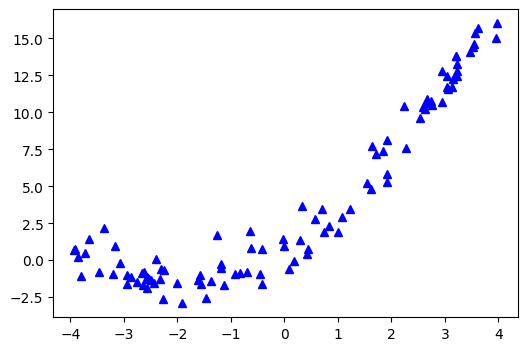

In [7]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
# mean is 0 and distributed between -4 and 4 random X
X = 8*np.random.rand(m,1) - 4
# X^2 항의 계수가 0.5, X항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2* X + 1 +np.random.randn(m,1)

plt.figure(figsize=(6,4))
plt.plot(X, y, 'b^')

* Now make a Linear regression model and find Coef and intercept and draw plot

Score of model: 0.803
Coef & intercept: [[2.12838486]] [3.92251936]


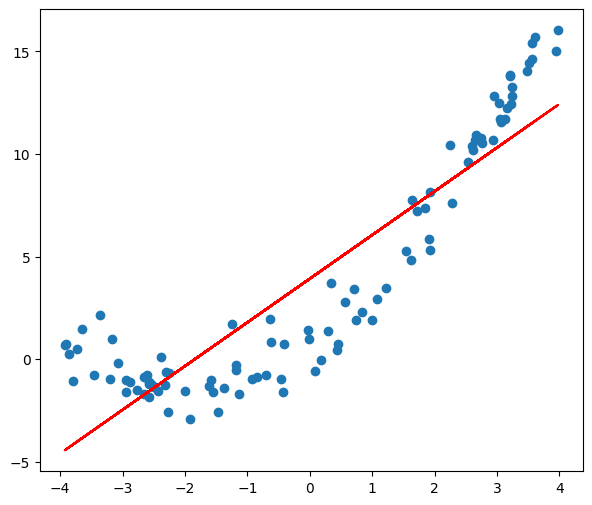

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(X, y)
print('Score of model:', round(model.score(X,y),3))
print('Coef & intercept:', model.coef_, model.intercept_)

plt.figure(figsize=(7,6))
y_predict = model.predict(X)
plt.scatter(X,y)
plt.plot(X.flatten(), y_predict, color='r')

* Graph above shows distribution of data is quadratic equation but we made a linear equation model. Hence, we have unsatisfied score of 80% score from model.
* To fix this we need to use scikitlearn's submodule 'preprocessing'.
* This 'preprocessing' module's PolynomialFeatures() class add arbitrary polynomial feature
* If given term is [x], it returns [1, x, x2]/
* If given term is [a, b], it returns [1,a,b,a2,ab,b2] which is fit_transform method





In [17]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(2).reshape(-1,1) # Take sample data
print(X)

poly = PolynomialFeatures() # default degree is 2
X = poly.fit_transform(X)
print(X) # add polynomial characteristic

print(poly.get_feature_names_out()) # get feature name

[[0]
 [1]]
[[1. 0. 0.]
 [1. 1. 1.]]
['1' 'x0' 'x0^2']


* '1' is bias and if you do not want to add it, use 'include_bias=False'.
* Now add polynomial characteristic to data X and train X_poly with model

In [19]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly_features.fit_transform(X)
# model = LinearRegression()
# model.fit(X_poly,y)
# print('Coef & intercept:', model.coef_, model.intercept_)
# print('Score:', round(model.score(X_poly,y),3))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data (same as before)
m = 100
X_original = 8 * np.random.rand(m, 1) - 4
y = 0.5 * X_original**2 + 2 * X_original + 1 + np.random.randn(m, 1)

# Apply PolynomialFeatures transformation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_original)  # Use original X

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Print results
print('Coef & intercept:', model.coef_, model.intercept_)
print('Score:', round(model.score(X_poly, y), 3))

Coef & intercept: [[1.96363717 0.46759339]] [1.04249386]
Score: 0.969


* We have considerably high score of 0.969 which is much better than we made a linear model.
* Now make -4 to 4 domain and add polynomial characteristic, then use it as model.predict() input

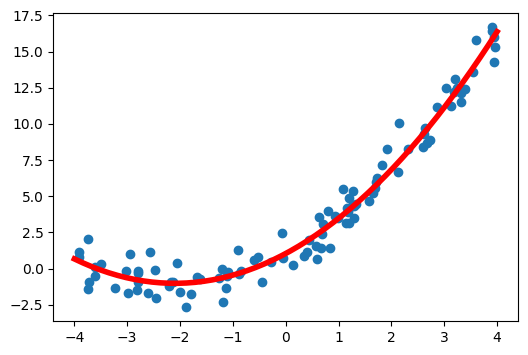

In [21]:
# -4 to 4 domain
domain = np.linspace(-4,4,50).reshape(-1,1)
# From domain data add polynomial characteristic
domain_2 = poly_features.fit_transform(domain)
plt.figure(figsize=(6,4))
y_predict = model.predict(domain_2)
plt.scatter(X_original, y)
plt.plot(domain, y_predict, color='r', linewidth=4)

* From the plot above, polynomial equation created by polynomial regression model predicts well of data distribution.
* In polynomial regression model, if n-1's refraction is found, we make n's degree polynomial equation model.
* In this example, we found only one refraction, so we used quadratic equation.

# LAB 8-2 Make Cubic equation & Polynomial regression


Coef & Intercept: [[4.89786257 0.49715795]] [2.6108641]
Score: 0.833


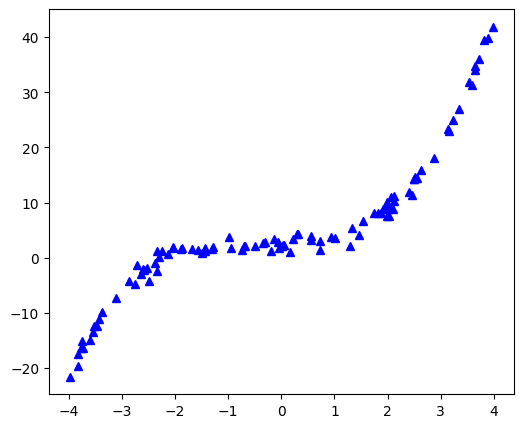

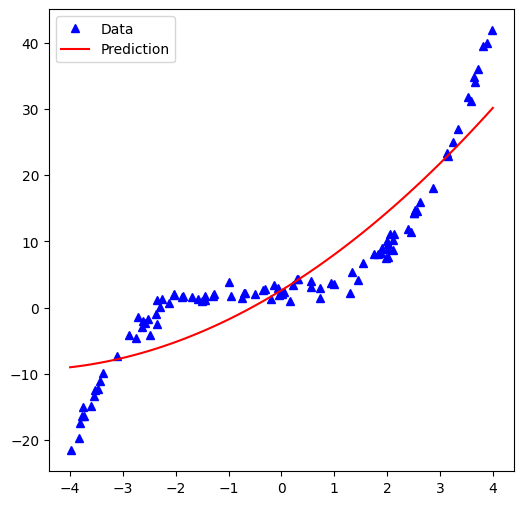

In [23]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 8 *np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + 3 + np.random.randn(m,1)
plt.figure(figsize=(6,5))
plt.plot(X,y,'b^')

# Make polynomial regression model and print coef, intercept and score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Since data's distribution has 2 refraction, we make cubic equation model
poly_features == PolynomialFeatures(degree=3,\
                                    include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

print('Coef & Intercept:', model.coef_, model.intercept_)
print('Score:', round(model.score(X_poly,y),3))

# Draw polynomial regression line
X_new = np.linspace(-4,4,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

plt.figure(figsize=(6,6))
plt.plot(X, y, 'b^', label='Data')
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend()

# 8.9 Overlifting
* The more degree and term polynomial regression model has, the better the model will be.
* But in reality it is not true, because of overlifting!

# 8.10 Underlifting
* If we make more polynomial characteristic than number of data, we can perfectly explain train data.
* But this model is overlifted to train data which cause bad performance for test data.
* Another problem is that the more degree equation has, the increment of input is too much.
* Model complexity is higher, model precision is not accurate.
* If data's distribution is non-linear and we make a linear model. This is underlifting!! Can't predict new data at all.
* But thankfully we have optimal fiting.
* Way to improve model for Underlifting
  1. Increase train model's complexity
  2. Change data's feature or increase size of it
  3. Use polynomial regression model
* Way to improve model for Overlifting
  1. Decrease train model's complexity
  2. Provide more data

* Regularization is introduced to solve these problems.
 * We regulate model's training so that we standardize the learning


# 8.11 Ridge Regression
* make Linear model's theta small so that it mitigate Overlifting.
* Now make 20 data and make it train and test set. And then make 20'th degree polynomial feature linear regression model, fit the data and print the score.


In [25]:
# Create 20 data
m = 20
X = 8 * np.random.rand(m,1) - 4
y = .5 * X **3 + .5 * X ** 2 + X + 3 + np.random.randn(m,1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Create 20 polynomial characteristic
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Make linear regression
model = LinearRegression()
model.fit(X_train_poly, y_train)
print('Score of train data:', round(model.score(X_train_poly, y_train),3))
print('Score of test data:', round(model.score(X_test_poly, y_test),3))

Score of train data: 1.0
Score of test data: -32512609648.036


* Just like we have seen before, train data's score is 100 but test data's score is overlifted.
* Use Ridge regression to this example of Overlifting.
* First, use standard scalar to every input, because Ridge regression is sensitive to input.

### Penalty ###

In [26]:
## Penalize ##
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # penalized model should be converted with scaler
ss.fit(X_train_poly)
train_scaled, test_scaled = ss.transform(X_train_poly), ss.transform(X_test_poly)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test)

## Ridge regression ##
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(train_scaled, y_train_scaled)
print('Score of train data:', round(ridge.score(train_scaled, y_train_scaled),3))
print('Score of test data:', round(ridge.score(test_scaled, y_test_scaled),3))

Score of train data: 0.969
Score of test data: 0.925


* From the code, alpha means penaly term.

Shpae of diabetes.data: (442, 10)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Score of train data: 0.358
Score of test data: 0.306
[[151.]
 [ 75.]
 [141.]
 [206.]
 [135.]]
[[-0.01471948]
 [-1.00165882]
 [-0.14457991]
 [ 0.69951294]
 [-0.22249618]]


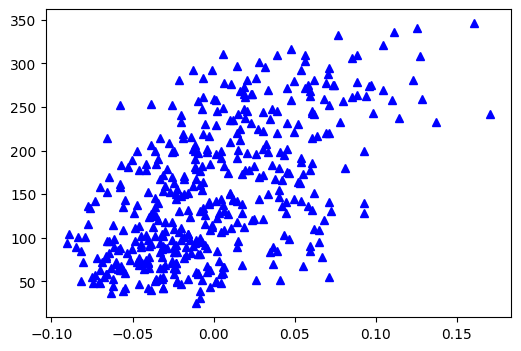

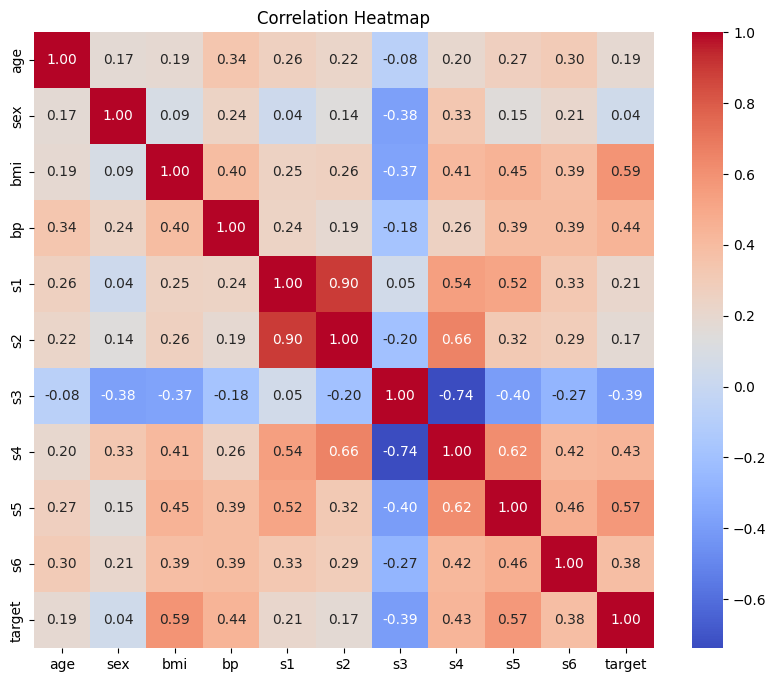

bmi    0.59
s5     0.57
bp     0.44
Name: target, dtype: float64
Score of train: 0.522
Score of test: 0.379
Score of train: 0.496
Score of test: 0.553


In [78]:
# Exercise
from sklearn import datasets
import seaborn as sns

# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어 들인다.
diabetes = datasets.load_diabetes()
print('Shpae of diabetes.data:', diabetes.data.shape)

# Convert dataset to DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target # df['target'] is not added so...
print(df.head())
# Make a model that predict target based on BMI
X = df['bmi'].values.reshape(-1,1)
y = df['target'].values.reshape(-1,1)

# Check distribution
plt.figure(figsize=(6,4))
plt.plot(X,y,'b^')

# # ratio is 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)
print('Score of train data:', round(model.score(X_train, y_train),3))
print('Score of test data:', round(model.score(X_test, y_test),3))

# diabete scale from 25 to 364 integer value. Use StandardScaler to convert -1 to 1 float
ss = StandardScaler()
ss.fit(y)
y_scaled = ss.transform(y)
print(y[:5])
print(y_scaled[:5])

# Find correlationship between target(diabete rate) and other features
# First append target and features into a signle numpy array

# Find correlaiton coefficient
corr_matrix = df.corr()

# Draw heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Print top 3 correlated features
c = df.corr(numeric_only=True).round(2)['target']
c = np.abs(c)
print(c.sort_values(ascending=False)[1:4]) # print top 3 highest values

# Based on correlation coefficient above, make a model that takes top 3 correlated features
top_features = corr_matrix['target'].drop('target').abs().nlargest(3).index.tolist()

X = df[top_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)
print('Score of train:', round(model.score(X_train, y_train),3))
print('Score of test:', round(model.score(X_test, y_test),3))


# Make a model that takes every features
features = corr_matrix['target'].drop('target').abs().index.tolist()
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)
print('Score of train:', round(model.score(X_train, y_train),3))
print('Score of test:', round(model.score(X_test, y_test),3))

